This is Data Preprocessing and EDA Analysis of the Project, which is developed on Python. Please upload the US_New_Data_With_EPU.csv file for the analysis before running the code.

For TVP-VAR connectedness and Spillover analysis, please use the New_US_Code_R & New_AU_Code_R notebook instead.

In [ ]:
# Libraries Loading:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import json
from datetime import datetime
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

In [ ]:
# Sample dataframe
data = pd.read_csv("US_New_Data_With_EPU.csv")

# Convert to dataframe
df = pd.DataFrame(data)

# Convert 'Date' column to datetime (optional but recommended for proper date handling)
df['Date'] = pd.to_datetime(df['Date'])

# Set 'Date' column as the index
df.set_index('Date', inplace=True)

# Display the updated dataframe
print(df)

                  WTI      Gold    S&P500      USDI         EPU         OPU
Date                                                                       
2004-01-10  14.518789  2.425807  1.391696 -2.844564  118.341453  300.811176
2004-01-11  -9.200303  5.086382  3.786878 -3.707016   96.695767  242.968242
2004-01-12 -11.189348 -2.795545  3.194249 -1.192613   66.532877  163.934644
2005-01-01   7.789230 -3.677235 -2.561575  3.344793   66.734328  104.663882
2005-01-02   2.383828  3.029687  1.872693 -1.312402   51.695687  126.600752
...               ...       ...       ...       ...         ...         ...
2023-01-03  -4.730747  7.420961  3.445125 -2.276113  200.489936  109.070876
2023-01-04   8.084017  1.099176  1.453620 -0.832644  165.417559  150.420888
2023-01-05 -10.431219 -1.384149  0.247925  2.592504  205.176458   64.430287
2023-01-06  -1.875540 -2.201605  6.271891 -1.370413  179.308044   77.111994
2023-01-07   7.959366  2.297874  3.066393 -1.025550  132.710630   27.483571

[226 rows x

In [ ]:
# Data Checks And EDA:
df.shape

(226, 6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 226 entries, 2004-01-10 to 2023-01-07
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   WTI     226 non-null    float64
 1   Gold    226 non-null    float64
 2   S&P500  226 non-null    float64
 3   USDI    226 non-null    float64
 4   EPU     226 non-null    float64
 5   OPU     226 non-null    float64
dtypes: float64(6)
memory usage: 12.4 KB


In [ ]:
null_percentage = (df.isnull().sum() / len(df)) * 100
null_percentage.sort_values(ascending=True)

,0
WTI,0.0
Gold,0.0
S&P500,0.0
USDI,0.0
EPU,0.0
OPU,0.0


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
WTI,226.0,0.223053,10.987996,-56.812501,-4.993116,1.466214,6.106317,54.562104
Gold,226.0,0.684405,4.849209,-18.449146,-2.332383,0.351491,3.719395,12.061820
S&P500,226.0,0.626184,4.391617,-18.563649,-1.707072,1.252789,3.276467,11.942090
USDI,226.0,0.067948,2.240677,-6.817635,-1.380627,0.059295,1.466039,7.490780
EPU,226.0,144.846080,68.994952,44.782751,98.331972,133.556701,176.832924,503.963337
OPU,226.0,123.708787,70.443793,18.698283,69.869154,110.215953,160.733398,367.731508


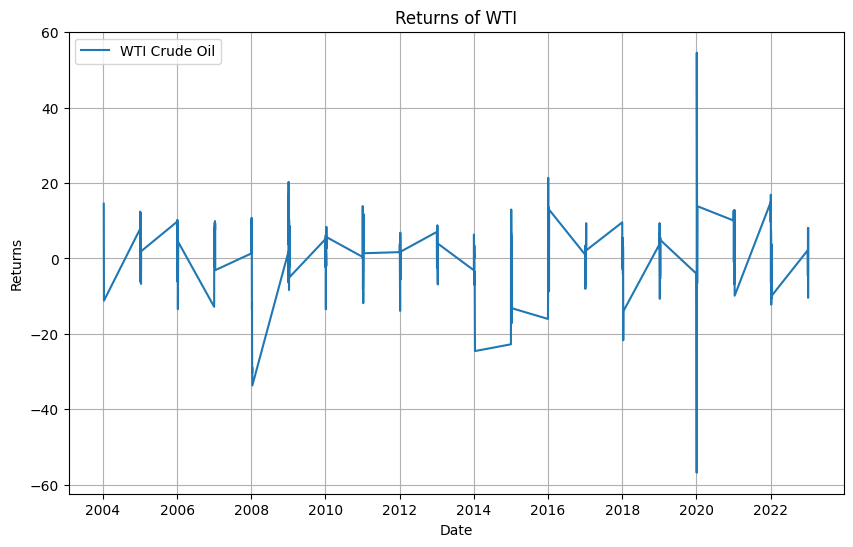

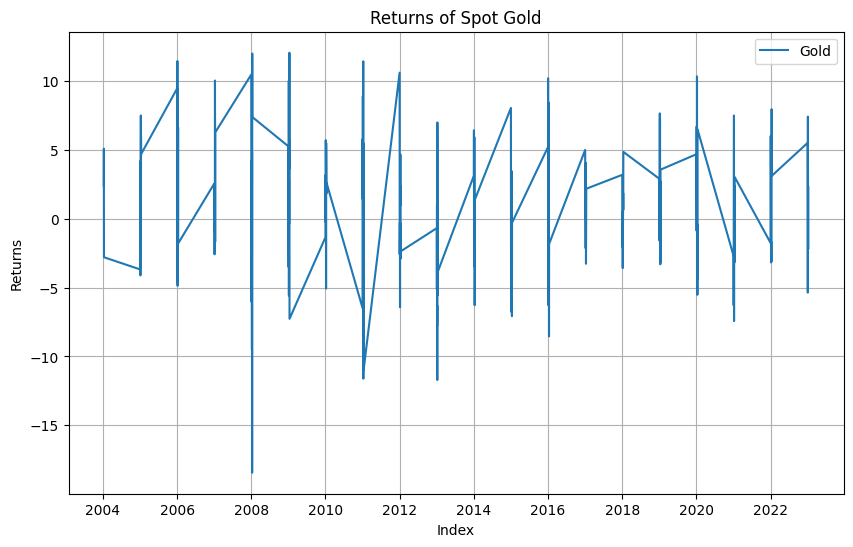

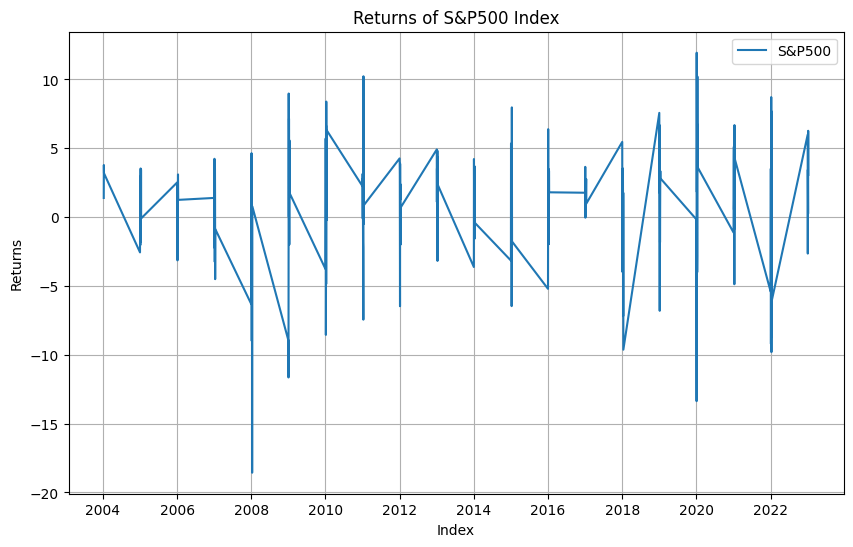

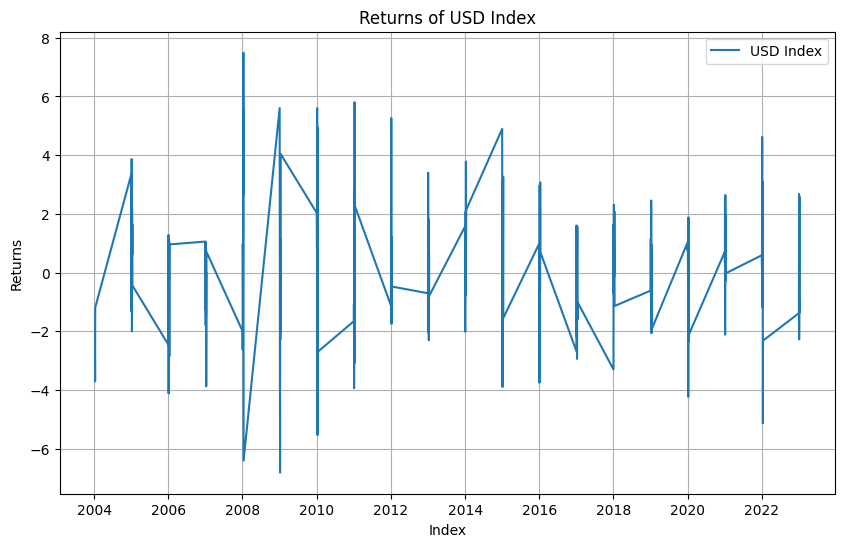

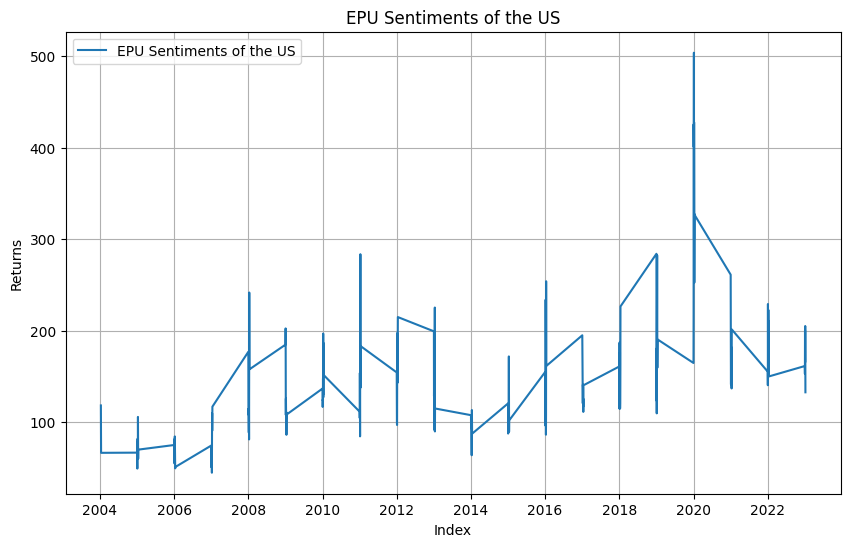

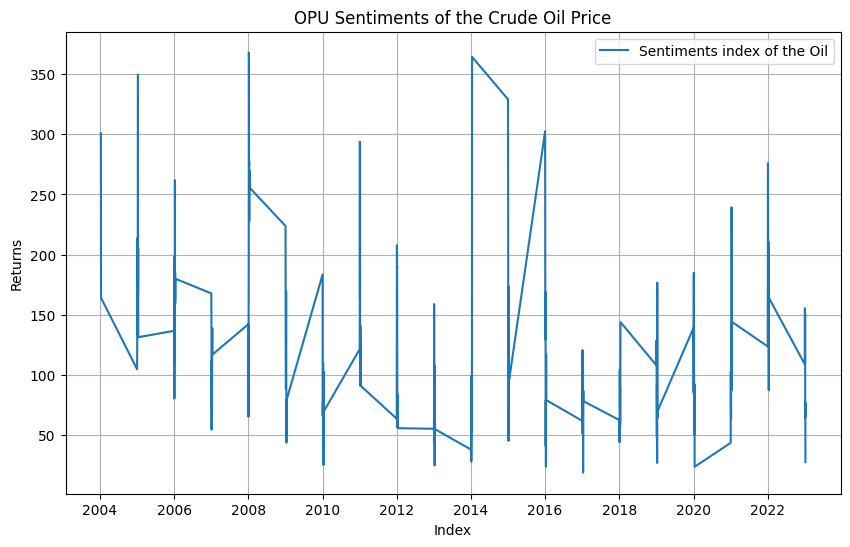

In [ ]:
# Time series Plots:
plt.figure(figsize=(10, 6))
plt.plot(df.index, df["WTI"], label="WTI Crude Oil")
plt.title("Returns of WTI")
plt.xlabel("Date")
plt.ylabel("Returns")
plt.legend()
plt.grid()
plt.show()


plt.figure(figsize=(10, 6))
plt.plot(df.index, df["Gold"], label="Gold")
plt.xlabel("Index")
plt.ylabel("Returns")
plt.title("Returns of Spot Gold")
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(df.index, df["S&P500"], label="S&P500")
plt.xlabel("Index")
plt.ylabel("Returns")
plt.title("Returns of S&P500 Index")
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(df.index, df["USDI"], label="USD Index")
plt.xlabel("Index")
plt.ylabel("Returns")
plt.title("Returns of USD Index")
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(df.index, df["EPU"], label="EPU Sentiments of the US")
plt.xlabel("Index")
plt.ylabel("Returns")
plt.title("EPU Sentiments of the US")
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(df.index, df["OPU"], label="Sentiments index of the Oil")
plt.xlabel("Index")
plt.ylabel("Returns")
plt.title("OPU Sentiments of the Crude Oil Price")
plt.legend()
plt.grid()
plt.show()

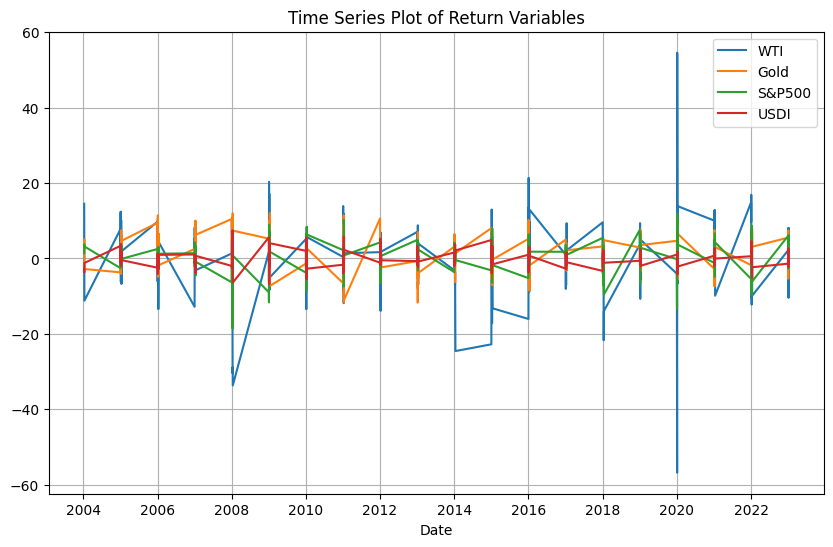

In [ ]:
#Combine Time Series Plots of Return Variables:
columns = df.columns[0:4]
plt.figure(figsize=(10, 6))

for var in columns:
    plt.plot(df.index, df[var], label=var)

plt.title("Time Series Plot of Return Variables")
plt.xlabel("Date")
plt.ylabel("")
plt.legend()
plt.grid()
plt.show()

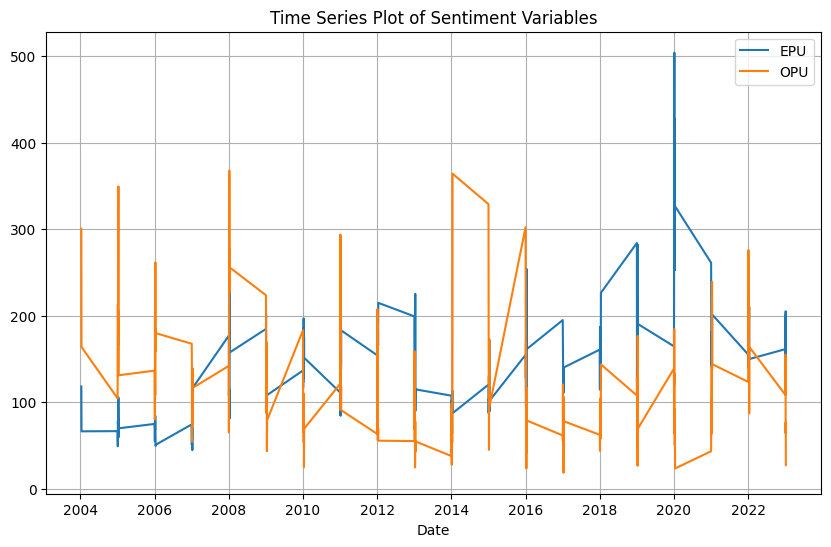

In [ ]:
#Combine Time Series Plots of Sentiment Index Variables:
columns = df.columns[-2:]
plt.figure(figsize=(10, 6))

for var in columns:
    plt.plot(df.index, df[var], label=var)

plt.title("Time Series Plot of Sentiment Variables")
plt.xlabel("Date")
plt.ylabel("")
plt.legend()
plt.grid()
plt.show()

In [ ]:
#outlier function
def find_outlier_rows(df, col, level='both'):

  """
    Finds the rows with outliers in a given column of a dataframe.

    This function takes a dataframe and a column as input, and returns the rows
    with outliers in the given column. Outliers are identified using the
    interquartile range (IQR) formula. The optional level parameter allows the
    caller to specify the level of outliers to return, i.e., lower, upper, or both.

    Args:
        df: The input dataframe.
        col: The name of the column to search for outliers.
        level: The level of outliers to return, i.e., 'lower', 'upper', or 'both'.
               Defaults to 'both'.

    Returns:
        A dataframe containing the rows with outliers in the given column.
  """
  # compute the interquartile range
  iqr = df[col].quantile(0.75) - df[col].quantile(0.25)

  # compute the upper and lower bounds for identifying outliers
  lower_bound = df[col].quantile(0.25) - 1.5 * iqr
  upper_bound = df[col].quantile(0.75) + 1.5 * iqr

  # filter the rows based on the level of outliers to return
  if level == 'lower':
      return df[df[col] < lower_bound]
  elif level == 'upper':
      return df[df[col] > upper_bound]
  else:
      return df[(df[col] > upper_bound) | (df[col] < lower_bound)]

In [ ]:
def count_outliers(df):
  """
  This function takes in a DataFrame and returns a DataFrame containing the count and
  percentage of outliers in each numeric column of the original DataFrame.

  Input:
      df: a Pandas DataFrame containing numeric columns

  Output:
      a Pandas DataFrame containing two columns:
      'outlier_counts': the number of outliers in each numeric column
      'outlier_percent': the percentage of outliers in each numeric column
  """
  # select numeric columns
  df_numeric = df.select_dtypes(include=['int', 'float'])

  # get column names
  columns = df_numeric.columns

  # find the name of all columns with outliers
  outlier_cols = [col for col in columns if len(find_outlier_rows(df_numeric, col)) != 0]

  # dataframe to store the results
  outliers_df = pd.DataFrame(columns=['outlier_counts', 'outlier_percent'])

  # count the outliers and compute the percentage of outliers for each column
  for col in outlier_cols:
      outlier_count = len(find_outlier_rows(df_numeric, col))
      all_entries = len(df[col])
      outlier_percent = round(outlier_count * 100 / all_entries, 2)

      # store the results in the dataframe
      outliers_df.loc[col] = [outlier_count, outlier_percent]

  # return the resulting dataframe
  return outliers_df

In [ ]:
count_outliers(df).sort_values('outlier_counts', ascending=False)

,outlier_counts,outlier_percent
WTI,10.0,4.42
S&P500,8.0,3.54
EPU,8.0,3.54
OPU,7.0,3.10
USDI,4.0,1.77
Gold,3.0,1.33


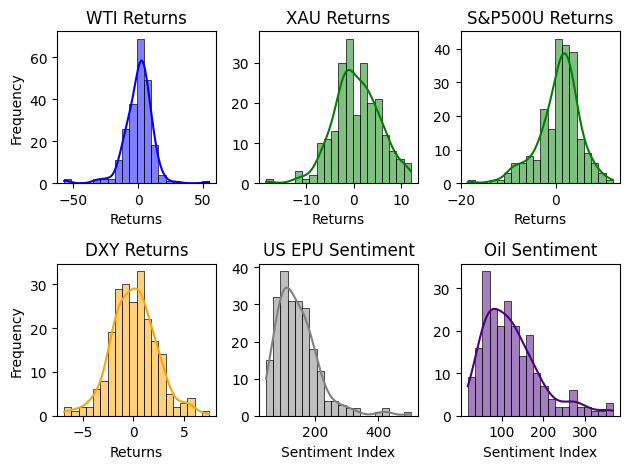

In [ ]:
# Plot histogram for WTI
plt.subplot(2, 3, 1)
sns.histplot(df['WTI'], bins=20, kde=True, color='blue')
plt.title('WTI Returns')
plt.xlabel('Returns')
plt.ylabel('Frequency')

# Plot histogram for Gold
plt.subplot(2, 3, 2)
sns.histplot(df['Gold'], bins=20, kde=True, color='green')
plt.title('XAU Returns')
plt.xlabel('Returns')
plt.ylabel('')

# Plot histogram for S&P500:
plt.subplot(2, 3, 3)
sns.histplot(df['S&P500'], bins=20, kde=True, color='green')
plt.title('S&P500U Returns')
plt.xlabel('Returns')
plt.ylabel('')

# Plot histogram for DXY:
plt.subplot(2, 3, 4)
sns.histplot(df['USDI'], bins=20, kde=True, color='orange')
plt.title('DXY Returns')
plt.xlabel('Returns')
plt.ylabel('Frequency')

# Plot histogram for EPU:
plt.subplot(2, 3, 5)
sns.histplot(df['EPU'], bins=20, kde=True, color='grey')
plt.title('US EPU Sentiment')
plt.xlabel('Sentiment Index')
plt.ylabel('')

# Plot histogram for OPU:
plt.subplot(2, 3, 6)
sns.histplot(df['OPU'], bins=20, kde=True, color='indigo')
plt.title('Oil Sentiment')
plt.xlabel('Sentiment Index')
plt.ylabel('')

# Adjust layout
plt.tight_layout()
plt.show()

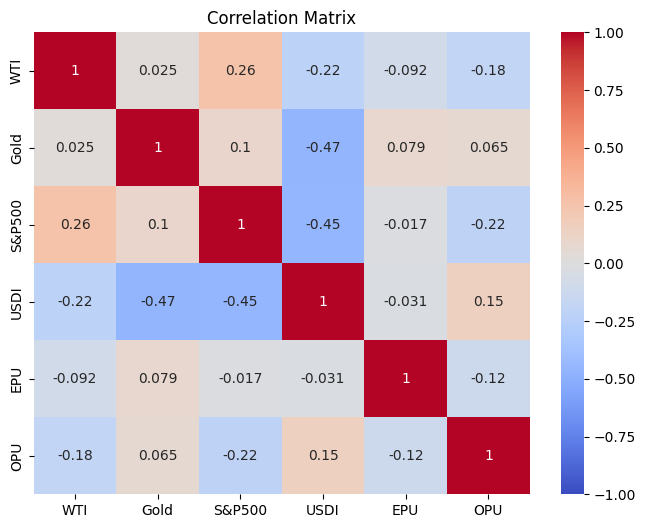

Correlation Matrix:
          WTI  Gold  S&P500  USDI   EPU   OPU
WTI     1.00  0.03    0.26 -0.22 -0.09 -0.18
Gold    0.03  1.00    0.10 -0.47  0.08  0.06
S&P500  0.26  0.10    1.00 -0.45 -0.02 -0.22
USDI   -0.22 -0.47   -0.45  1.00 -0.03  0.15
EPU    -0.09  0.08   -0.02 -0.03  1.00 -0.12
OPU    -0.18  0.06   -0.22  0.15 -0.12  1.00


In [ ]:
# Calculate and visualize correlations
correlation_matrix = df[["WTI", "Gold", "S&P500", "USDI", "EPU", "OPU"]].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()
print("Correlation Matrix:\n", correlation_matrix.round(2))

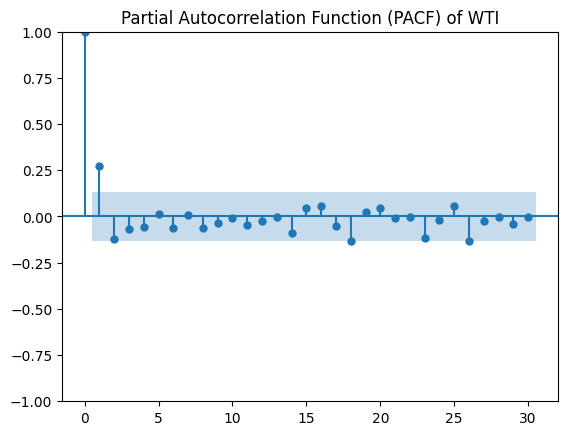

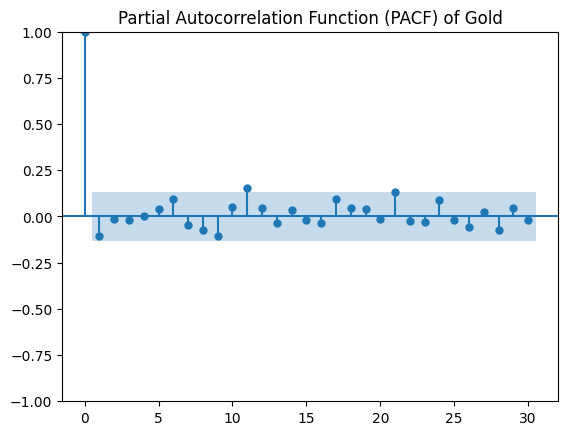

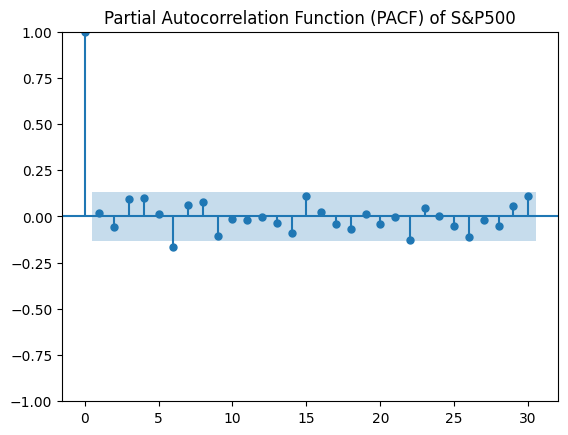

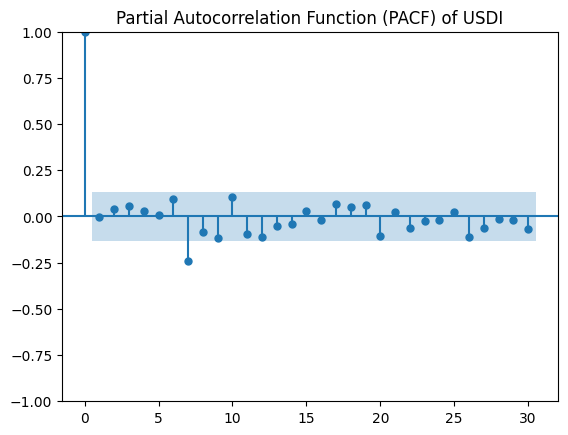

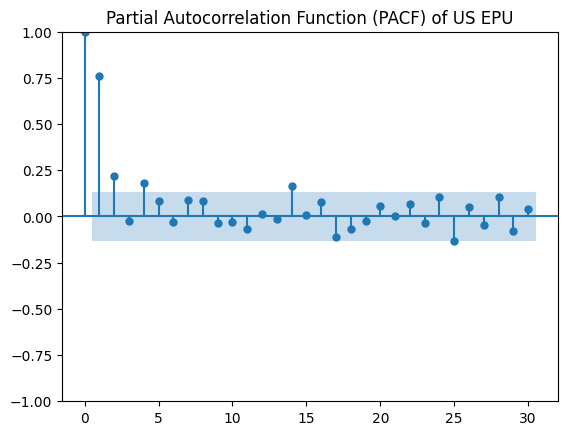

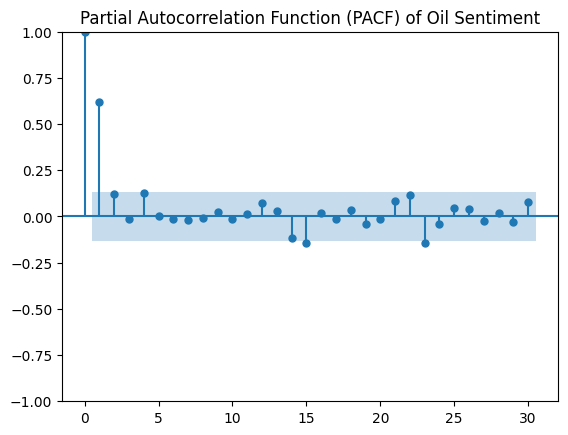

In [ ]:
# PACF plots
plot_pacf(df['WTI'], lags=30)
plt.title('Partial Autocorrelation Function (PACF) of WTI')
plt.show()


plot_pacf(df['Gold'], lags=30)
plt.title('Partial Autocorrelation Function (PACF) of Gold')
plt.show()

plot_pacf(df['S&P500'], lags=30)
plt.title('Partial Autocorrelation Function (PACF) of S&P500')
plt.show()

# PACF plots
plot_pacf(df['USDI'], lags=30)
plt.title('Partial Autocorrelation Function (PACF) of USDI')
plt.show()


plot_pacf(df['EPU'], lags=30)
plt.title('Partial Autocorrelation Function (PACF) of US EPU')
plt.show()

plot_pacf(df['OPU'], lags=30)
plt.title('Partial Autocorrelation Function (PACF) of Oil Sentiment')
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller

for col in df.columns:
  # ADF Test
  result = adfuller(df[col])

  # Print test statistics
  print(f"Test Statistic for {col}: {result[0]:.4f}")
  print(f"p-value for {col}: {result[1]:.4f}")

  # Interpretation (adjust significance level as needed)
  if result[1] < 0.05:
    print(f"{col} is likely stationary (rejects unit root).")
  else:
    print(f"{col} might be non-stationary (fails to reject unit root).")
  print("--------------------------------------")

Test Statistic for WTI: -10.1175
p-value for WTI: 0.0000
WTI is likely stationary (rejects unit root).
--------------------------------------
Test Statistic for Gold: -16.6353
p-value for Gold: 0.0000
Gold is likely stationary (rejects unit root).
--------------------------------------
Test Statistic for S&P500: -6.1997
p-value for S&P500: 0.0000
S&P500 is likely stationary (rejects unit root).
--------------------------------------
Test Statistic for USDI: -5.5376
p-value for USDI: 0.0000
USDI is likely stationary (rejects unit root).
--------------------------------------
Test Statistic for EPU: -3.3107
p-value for EPU: 0.0144
EPU is likely stationary (rejects unit root).
--------------------------------------
Test Statistic for OPU: -5.7686
p-value for OPU: 0.0000
OPU is likely stationary (rejects unit root).
--------------------------------------
